# Titanic - Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Variables Dictionary

- Variable | Definition | Key
- survival | Survival | 0 = No, 1 = Yes
- pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd
- sex | Sex
- Age | Age in years
- sibsp | # of siblings / spouses aboard the Titanic
- parch | # of parents / children aboard the Titanic
- ticket | Ticket number
- fare | Passenger fare
- cabin | Cabin number
- embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

## EDA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Let's make buckets for our columns

1) Target = Survived
2) Numerical = Pclass, Age, SibSp, Parch, Fare
3) Categorical = Sex, Embarked
4) Not sure = Name, Ticket, Cabin

### Univariate Analysis

When exploring our dataset and its features, we have many options available to us. We can explore each feature individually, or compare pairs of features, finding the correlation between. Let's start with some simple Univariate (one feature) analysis.

Features can be of multiple types:

- Nominal: is for mutual exclusive, but not ordered, categories.
- Ordinal: is one where the order matters but not the difference between values.
- Interval: is a measurement where the difference between two values is meaningful.
- Ratio: has all the properties of an interval variable, and also has a clear definition of 0.0.

There are multiple ways of manipulating each feature type, but for simplicity, we'll define only two feature types:

- Numerical: any feature that contains numeric values.
- Categorical: any feature that contains categories, or text.


<AxesSubplot:xlabel='Embarked', ylabel='count'>

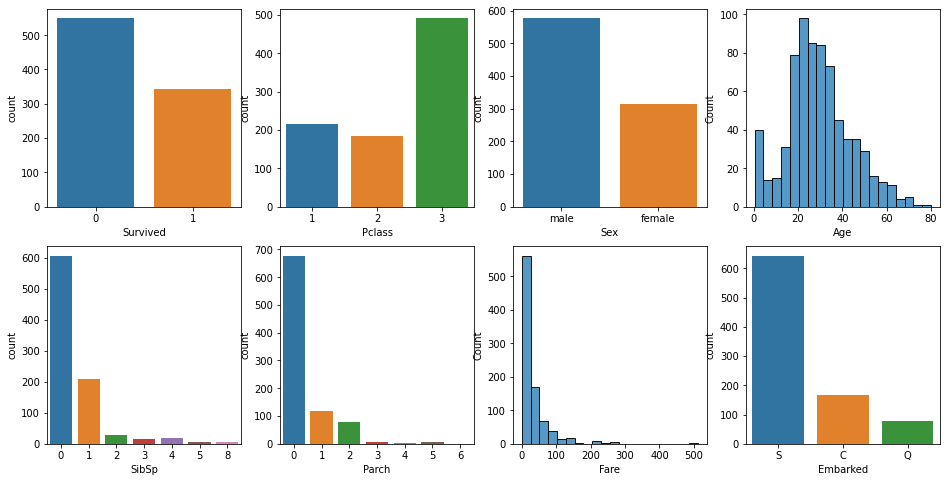

In [7]:
fig, ax = plt.subplots(2, 4, figsize=(16, 8))
sns.countplot(ax=ax[0, 0], data=train, x='Survived')
sns.countplot(ax=ax[0, 1], x='Pclass', data=train)
sns.countplot(ax=ax[0, 2], x='Sex', data=train)
sns.histplot(ax=ax[0, 3], x=train['Age'])
sns.countplot(ax=ax[1, 0], x='SibSp', data=train)
sns.countplot(ax=ax[1, 1], x='Parch', data=train)
sns.histplot(ax=ax[1, 2], x=train['Fare'], bins=20)
sns.countplot(ax=ax[1, 3], x='Embarked', data=train)

### Is there any missing values in our data?

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

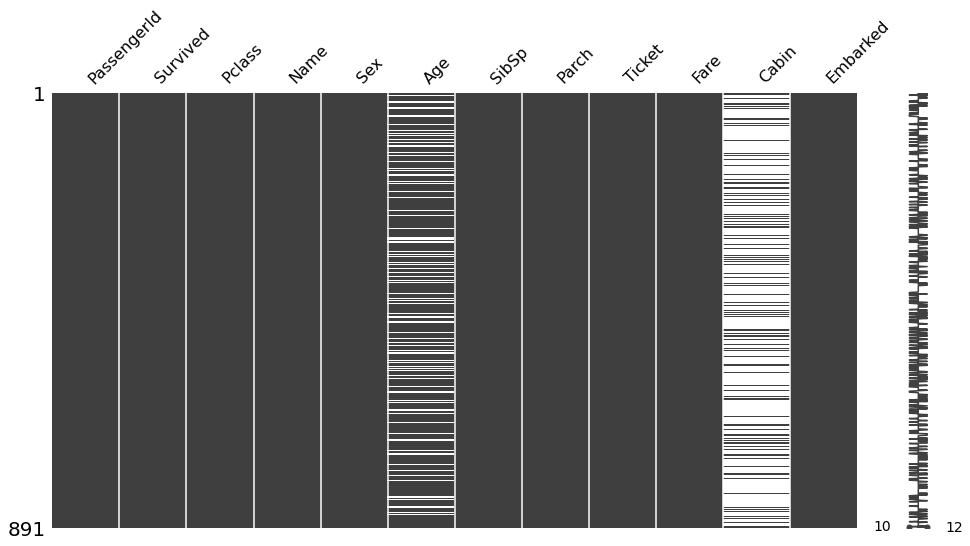

In [9]:
msno.matrix(train, figsize=(16, 8))

- Age contain 177 missing values, since the distribution of age is right skewed we might consider fill the missing value with median.
- Cabin contain 687 missing values, roughly 70-80 % missing, we might consider to drop it.
- Embarked only contain 2 missing values, great we can fill it with most frequent values.

### Feature vs Target

In [10]:
def biplot(feature, bins='auto'):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.countplot(ax=ax[0], x=feature, data=train)
    sns.histplot(ax=ax[1], x=feature, hue='Survived', data=train, kde=True, bins=bins)

#### 1. Pclass

In [11]:
train.Pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [12]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

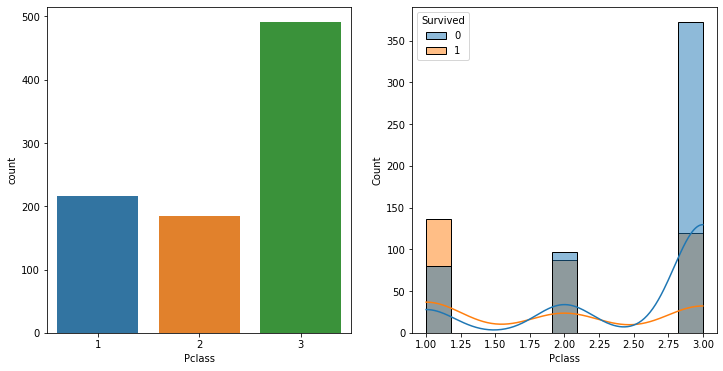

In [13]:
biplot('Pclass')

From plot above, we can see that first class have higher chance of survive, on the other hand the third class have higher chance not survive.

#### 2. Name

In [14]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

After looking at the Name columns, my thinking was: Is a person title affecting survive rate ?

#### 3. Sex

In [15]:
train.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [16]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

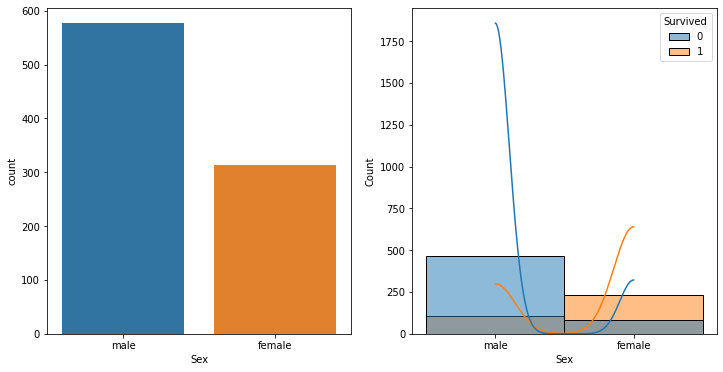

In [17]:
biplot('Sex')

Male are more likely to not survive, maybe they prioritized women first ?

#### 4. Age

In [18]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

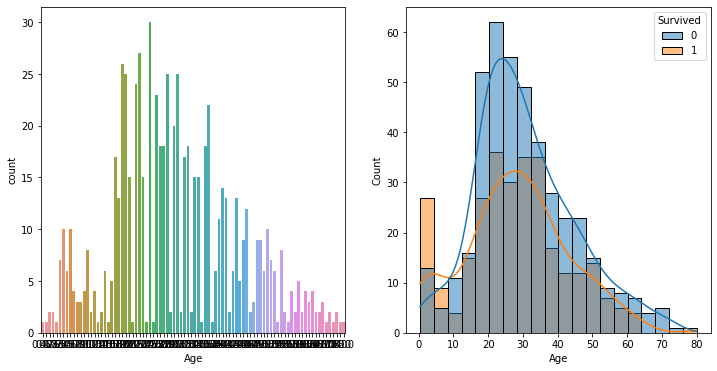

In [20]:
biplot('Age')

- People in age around 20 and 40 are have the higher chance of surviving
- Also we see that many children survived too

#### 5. SibSp

In [21]:
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [22]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

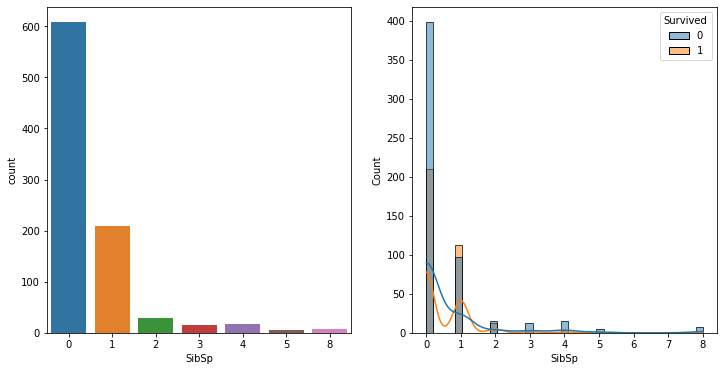

In [23]:
biplot('SibSp')

- Having 0 sibling or spouse have higher chance of not surviving, maybe they prioritized to save other people rather than themself ?
- Having 1 sibling or spouse have higher chance of surviving, maybe they helping each other to survive ?
- Having more than 1 sibling or spouse suprisingly have higher chance of not surviving, maybe they helping other people too after finish help their sibling or spouse ?

#### 6. Parch

In [24]:
train.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [25]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

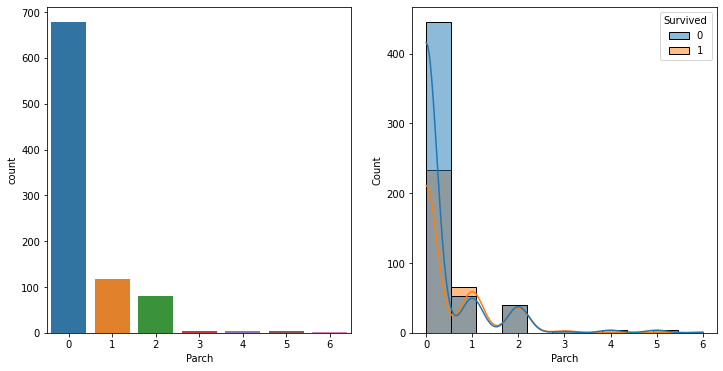

In [26]:
biplot('Parch')

#### 7. Ticket

In [27]:
len(train.Ticket.unique())

681

In [28]:
train.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

There are 681 unique values in Ticket I'm not sure how to encode that to reduce the dimensionality

#### 8. Fare

In [29]:
train.Fare.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [30]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

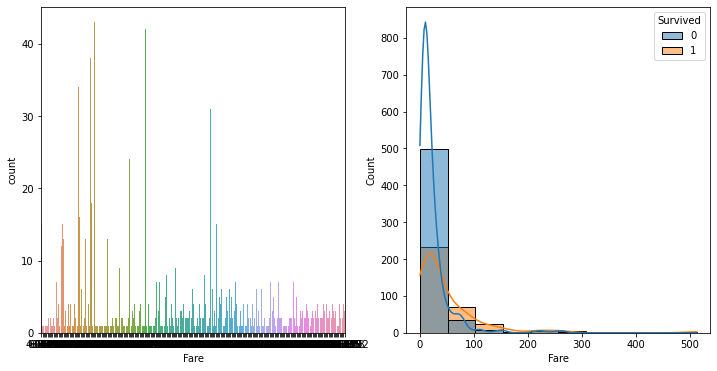

In [31]:
biplot('Fare', bins=10)

Looks like cheaper fare is not really safe, and higher price having higher chance to survive

#### 9. Cabin

In [32]:
train.Cabin.unique()[:10]

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78'], dtype=object)

In [33]:
len(train.Cabin.unique())

148

In [34]:
train.Cabin.isnull().sum()

687

There just too many missing values in Cabin column we might just drop it later

#### 10. Embarked

In [35]:
train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [36]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

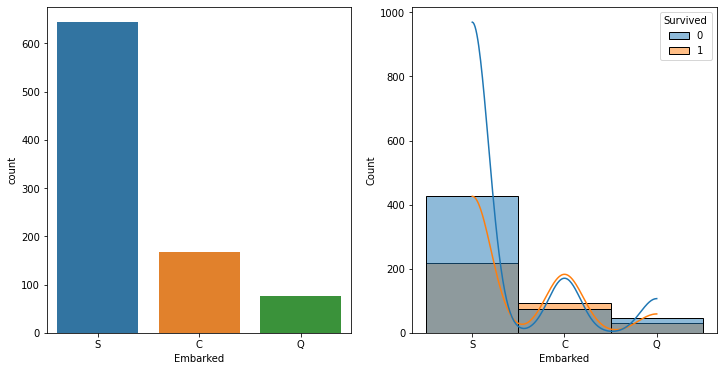

In [37]:
biplot('Embarked')

Maybe cheaper fare are people from Southampton and that's decrease the chance of surviving

<AxesSubplot:xlabel='Fare', ylabel='Count'>

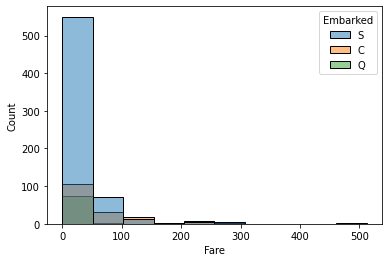

In [38]:
sns.histplot(x='Fare', hue='Embarked', data=train, bins=10)

Surely cheaper fare come from Southampton, now that explain it

## Model Building

### Selecting features and splitting data into features and target variable

In [39]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [40]:
X = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train.Survived

In [41]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


### Train test split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Preprocessing

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [45]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

In [46]:
from sklearn.compose import ColumnTransformer

In [47]:
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, ['SibSp', 'Parch', 'Age', 'Fare']),
    ('categoric', categorical_pipeline, ['Sex', 'Pclass', 'Embarked'])
])

### Pipeline

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

In [50]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch', 'Age',
                                                   'Fare']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                    

In [51]:
pipeline.score(X_test,y_test)

0.8100558659217877

### GridSearch CV

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
pipeline.get_params()

{'memory': None,
 'steps': [('prep', ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', MinMaxScaler())]),
                                    ['SibSp', 'Parch', 'Age', 'Fare']),
                                   ('categoric',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehot', OneHotEncoder())]),
                                    ['Sex', 'Pclass', 'Embarked'])])),
  ('algo', KNeighborsClassifier())],
 'verbose': False,
 'prep': ColumnTransformer(transformers=[('numeric',
                                  Pipeline(steps=[('imputer',
                                                   SimpleImputer(strategy='media

In [55]:
parameters = {
    'algo__n_neighbors': range(1, 51, 2),
    'algo__weights' : ['uniform', 'distance'],
    'algo__p' : [1, 2]
}

model = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['SibSp',
                                                                          'Parch',
                                                                          'Age',
                                                                          'Fare']),
                                                                        ('categoric

In [56]:
# result = pd.DataFrame(model.cv_results_)

In [57]:
# result.sort_values('rank_test_score').head()

In [58]:
model.best_params_

{'algo__n_neighbors': 11, 'algo__p': 2, 'algo__weights': 'uniform'}

In [59]:
model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test)

(0.827247191011236, 0.8103516202107752, 0.8044692737430168)

### Predicting Jack & Rose

In [60]:
data = [
    [1, 'female', 17, 1, 1, 40, 'S'],
    [3, 'male', 20, 0, 0, 8, 'S']
]

In [61]:
X_pred = pd.DataFrame(data, columns=X_train.columns, index=['Rose', 'Jack'])
X_pred

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Rose,1,female,17,1,1,40,S
Jack,3,male,20,0,0,8,S


In [62]:
X_pred['Survived'] = model.predict(X_pred)
X_pred

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Rose,1,female,17,1,1,40,S,1
Jack,3,male,20,0,0,8,S,0


### Save Model

In [63]:
import pickle

In [64]:
filename = 'knn_titanic.pkl'
pickle.dump(model, open(filename, 'wb'))

In [65]:
model.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch', 'Age',
                                                   'Fare']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                    

## Predict test

In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [67]:
X_pred = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [68]:
model.predict(X_pred)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [69]:
pred = pd.DataFrame({
    'PassengerId':test.PassengerId,
    'Survived':model.predict(X_pred)
})

In [70]:
pred.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [72]:
pred.to_csv('gender_submission.csv', index=False)